In [95]:
import seaborn as sns; sns.set()
%matplotlib inline
import os

In [114]:
import intake

ds = intake.open_catalog('production.yml')

In [117]:
df1 = ds.by_state(state='ND', bazean_postgres_username='jfoster').read()

In [119]:
df1

,date,api,volume_oil_formation_bbls,volume_gas_formation_mcf,volume_water_formation_bbls
0,2010-01-01,33007000110000,161,42,261
1,2010-02-01,33007000110000,221,47,374
2,2010-03-01,33007000110000,226,54,423
3,2010-04-01,33007000110000,205,55,372
4,2010-05-01,33007000110000,255,58,369
5,2010-06-01,33007000110000,179,42,194
6,2010-07-01,33007000110000,218,50,249
7,2010-08-01,33007000110000,188,44,233
8,2010-09-01,33007000110000,159,95,195
9,2010-10-01,33007000110000,142,100,186


In [116]:
df1.set_index(['api','date']).to_csv('ND_production.csv')

In [112]:
df2 = ds.csv.by_state(state='ND').read().head(300)
df2 = df2.set_index(['api','date'])

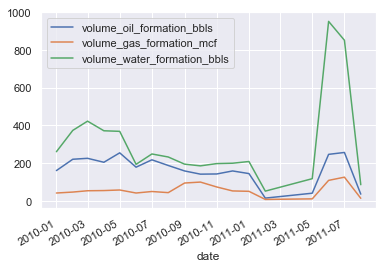

In [100]:
df1.loc['33007000110000'].plot()

In [113]:
df2

volume_oil_formation_bbls  \
api            date                                    
33007000110000 2010-01-01                        161   
               2010-02-01                        221   
               2010-03-01                        226   
               2010-04-01                        205   
               2010-05-01                        255   
               2010-06-01                        179   
               2010-07-01                        218   
               2010-08-01                        188   
               2010-09-01                        159   
               2010-10-01                        142   
               2010-11-01                        143   
               2010-12-01                        159   
               2011-01-01                        145   
               2011-02-01                         15   
               2011-05-01                         41   
               2011-06-01                        247   
               2011-07-01                        257   
               2011-08-01                         36   
33007000140000 2010-01-01                        214   
               2010-02-01                        288   
               2010-03-01                        316   
               2010-04-01                        281   
               2010-05-01                        293   
               2010-06-01                        182   
               2010-07-01                        277   
               2010-08-01                        244   
               2010-09-01                        270   
               2010-10-01                        242   
               2010-11-01                        239   
               2010-12-01                        247   
...                                              ...   
33007000400000 2012-10-01                        470   
               2012-11-01                        476   
               2012-12-01                        494   
               2013-01-01                        530   
               2013-02-01                        239   
               2013-05-01                        124   
               2013-06-01                        369   
               2013-07-01                        424   
               2013-08-01                        429   
               2013-09-01                        414   
               2013-10-01                        445   
               2013-11-01                        397   
               2013-12-01                        444   
               2014-01-01                        525   
               2014-02-01                        449   
               2014-03-01                        439   
               2014-04-01                        412   
               2014-05-01                        436   
               2014-06-01                        425   
               2014-07-01                        422   
               2014-08-01                        407   
               2014-09-01                        422   
               2014-10-01                        400   
               2014-11-01                        366   
               2014-12-01                        375   
               2015-01-01                        368   
               2015-02-01                        373   
               2015-03-01                        378   
               2015-04-01                        391   
               2015-05-01                        363   

                           volume_gas_formation_mcf  \
api            date                                   
33007000110000 2010-01-01                        42   
               2010-02-01                        47   
               2010-03-01                        54   
               2010-04-01                        55   
               2010-05-01                        58   
               2010-06-01                        42   
               2010-07-01                        50   
   